# Analyzing World Happiness
1. Research Question: How does the percentage increase of GDP over 40 years affect the happiness of a country?
2. Research Question: How does the percentage increase of life expectancy over 35 years affect the happiness of a country?
    - Reason for question: The original data set only gives information like GDP and life expectancy in relation to other countries; however, I would argue that how a country develops over the years (regardless of the growth of other countries) matters much more.
    - Assumption: Happiness is perspective, and positive perspective is that which has seen growth over the years; consequently, happiness depends heavily on the amount of percentile growth. Since GDP and life expectancy are easily measurable, I will focus on these data sets. In summation, happier countries will be those who have experienced considerable growth RELATIVE TO THEIR COUNTRY (regardless of their econonmic position in relation to other countries).
3. Research Question: How stable is a country's happiness?
    - Specifically, how many countries changed up or down by more than 25 places between 2015 and 2016? Between 2016 and 2017? How many changed more than 25 places in both years?
    - Do the same for 15 places
    - Would it be more accurate to simply rate them according to their happiness level?

- Random Question (NO): How do I add the region to df_2017 based on the regions in 2016?
- Random Question (NO): How do I change the region to simply be a continent?
- Random Question (NO): How do data scientists populate maps of the world instead of just graphs?

In [139]:
# explore what generators are!

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

In [141]:
# Think about a data folder
# .gitignore
df_2015 = pd.read_csv('C:\\Users\\paulb\\OneDrive\\Desktop\\Data Science\\Data Sets\\World Happiness Report\\2015.csv')
df_2016 = pd.read_csv('C:\\Users\\paulb\\OneDrive\\Desktop\\Data Science\\Data Sets\\World Happiness Report\\2016.csv')
df_2017 = pd.read_csv('C:\\Users\\paulb\\OneDrive\\Desktop\\Data Science\\Data Sets\\World Happiness Report\\2017.csv')
GDP = pd.read_excel('C:\\Users\\paulb\\OneDrive\\Desktop\\Data Science\\Data Sets\\World Happiness Report\\Country_GDP.xlsx')
life_expectancy = pd.read_excel('C:\\Users\\paulb\\OneDrive\\Desktop\\Data Science\\Data Sets\\World Happiness Report\\Life_Expectancy.xlsx')

# This can be done in read_csv
df_2015.rename(columns={'Happiness Rank':'Rank', 'Happiness Score':'Score', 'Standard Error':'SE', 'Economy (GDP per Capita)':'Economy', 'Health (Life Expectancy)':'LifeExp', 'Trust (Government Corruption)':'Corruption', 'Dystopia Residual':'Dystopia'}, inplace=True)
df_2016.rename(columns={'Happiness Rank':'Rank', 'Happiness Score':'Score', 'Lower Confidence Interval':'LowConInt', 'Upper Confidence Interval':'UpConInt', 'Standard Error':'SE', 'Economy (GDP per Capita)':'Economy', 'Health (Life Expectancy)':'LifeExp', 'Trust (Government Corruption)':'Corruption', 'Dystopia Residual':'Dystopia'}, inplace=True)
df_2017.rename(columns={'Happiness.Rank':'Rank', 'Happiness.Score':'Score', 'Whisker.high':'WhiskHigh', 'Whisker.low':'WhiskLow', 'Standard Error':'SE', 'Economy..GDP.per.Capita.':'Economy', 'Health..Life.Expectancy.':'LifeExp', 'Trust..Government.Corruption.':'Corruption', 'Dystopia.Residual':'Dystopia'}, inplace=True)

# Relevant data for this study is limited to past 40 years
GDP = GDP.drop(columns=[str(year) for year in range(1960, 1975)])
life_expectancy = life_expectancy.drop(columns=[year for year in range(1960,1975)])
life_expectancy = life_expectancy.drop(columns=[year for year in range(2016,2018)])

In [142]:
# DataFrame containing all relevant countries' GDP data
gdp_plot_frame = GDP[GDP['Country Name'].isin(df_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')

In [143]:
# Exploration of 20 Happiest Countries Recorded in 2015
happiest_countries_2015 = df_2015[df_2015['Rank'] < 11]
saddest_countries_2015 = df_2015[df_2015['Rank'] > 147]

In [144]:
happiest_plot_frame = GDP[GDP['Country Name'].isin(happiest_countries_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')
saddest_plot_frame = GDP[GDP['Country Name'].isin(saddest_countries_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')

In [145]:
def plot_gpd(df, country):
    '''This plots the GDP of the country/countries specified.'''
    df.T.plot(kind='line', figsize=(12,8))
    plt.xlabel('Years')
    plt.ylabel('GDP')
    plt.xticks([i for i in range(0, 41, 5)], [str(year) for year in range(1975, 2016, 5)])
    plt.title('GDP for {}'.format(country))
    plt.tight_layout()
    plt.show()

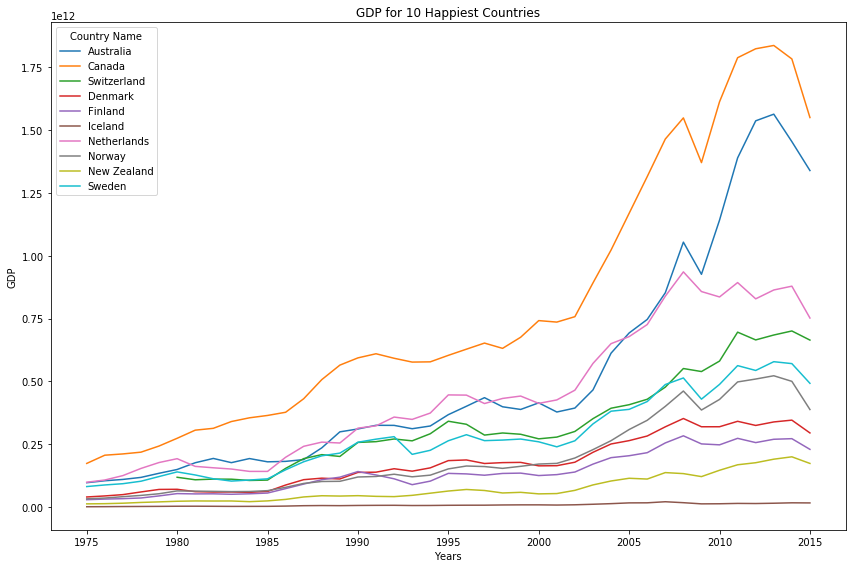

In [146]:
plot_gpd(happiest_plot_frame, "10 Happiest Countries")

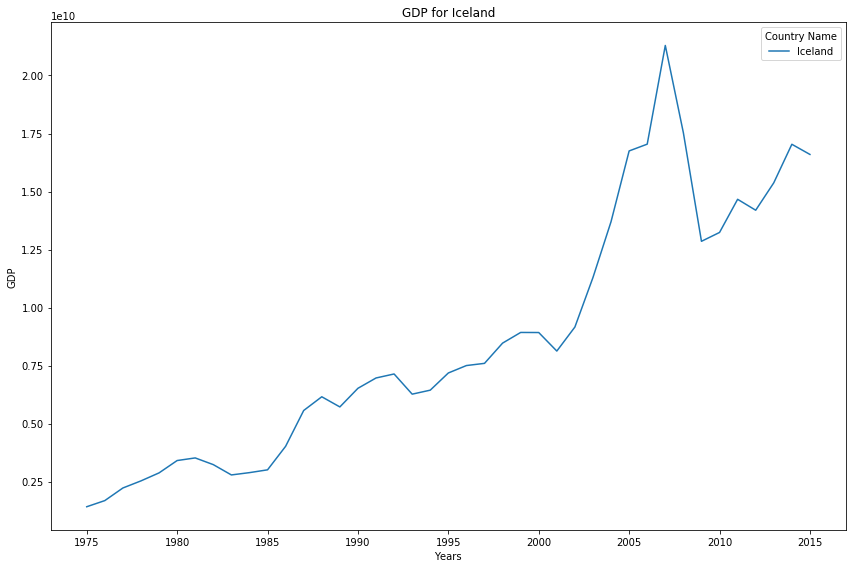

In [147]:
plot_gpd(happiest_plot_frame[happiest_plot_frame.index == 'Iceland'], "Iceland")

In [148]:
le_plot_frame = life_expectancy[life_expectancy['Country Name'].isin(df_2015['Country'])].drop(columns=['Country Code', 'Indicator Name', 'Indicator Code']).set_index('Country Name')

In [149]:
gdp_plot_frame

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,...,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.919944e+10
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267751e+11,1.026431e+11
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924242e+09,...,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.327796e+10,1.145560e+10
United Arab Emirates,1.472067e+10,1.921302e+10,2.487177e+10,2.377583e+10,3.122546e+10,4.359875e+10,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,...,2.221059e+11,2.579161e+11,3.154746e+11,2.535474e+11,2.860493e+11,3.485261e+11,3.734295e+11,3.871921e+11,3.994513e+11,3.702927e+11
Argentina,5.243865e+10,5.116950e+10,5.678100e+10,5.808287e+10,6.925233e+10,7.696192e+10,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,...,2.626665e+11,3.293175e+11,4.037820e+11,3.766279e+11,4.616402e+11,5.578902e+11,6.043785e+11,6.239320e+11,5.480549e+11,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.384452e+09,9.206302e+09,1.166204e+10,8.647937e+09,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.164444e+10,1.056140e+10
Australia,9.708180e+10,1.048153e+11,1.100975e+11,1.182179e+11,1.345848e+11,1.496546e+11,1.765273e+11,1.936511e+11,1.768994e+11,1.931978e+11,...,7.468808e+11,8.530533e+11,1.054558e+12,9.265638e+11,1.142251e+12,1.389919e+12,1.537478e+12,1.563951e+12,1.454675e+12,1.339539e+12
Austria,3.996270e+10,4.285649e+10,5.142159e+10,6.190277e+10,7.375918e+10,8.186123e+10,7.086311e+10,7.110359e+10,7.194728e+10,6.782157e+10,...,3.343094e+11,3.864590e+11,4.276115e+11,3.975943e+11,3.902351e+11,4.290107e+11,4.073730e+11,4.286986e+11,4.368875e+11,3.740559e+11
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.098302e+10,3.305034e+10,4.885248e+10,4.429149e+10,5.290270e+10,6.595163e+10,6.873091e+10,7.356048e+10,7.519801e+10,5.304714e+10


In [204]:
gdp_relative_average = []


for a in range(len(gdp_plot_frame)):
    for i in range(1,41):
        df = gdp_plot_frame.iloc[a,i]/gdp_plot_frame.iloc[a,i-1]
        gdp_relative_average.append(df)

print(gdp_relative_average)

# You need to make ever NaN a 1 so that it doesn't bias the data



[1.0798122347407266, 1.155652202159183, 1.1173814941554183, 1.1205879466723216, 0.9847977812753813, 0.9552586736117689, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.677245212910966, 1.110160068748786, 1.1531123106708165, 1.1872332101258896, 1.1247032526920335, 1.3947864256849718, 1.0352187094188467, 1.2253478130903361, 1.2762771473199386, 1.1250839995470645, 1.1453579775929636, 0.9761299436303444, 1.000192333303502, 0.9575688859863836, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.0, 1.5, 1.0000668493883282, 1.4479808826643281, 0.7122422936692064, 0.9778317822769926, 1.0305329709243078, 0.47669435351822864, 1.5152158517330991, 1.0163083274782456, 0.8425708308802297, 0.9546203645384954, 1.4837850057682787, 0.9787974814331772, 1.398529269349416, 1.1353569334085232, 1.3842356093487647, 1.4374996325575689, 1.4801269288100345, 1.4465105382661447, 1.3925481372446684, 0.8968181170968769, 1.0924401625107396, 1.26245629086

In [ ]:
gdp_relative_average = []

for a in range(len(gdp_plot_frame)):
    for i in range(1,41):
        df = gdp_plot_frame.iloc[a,i]/gdp_plot_frame.iloc[a,i-1]
        df_multiple = []
        df_multiple = df_multiple.append(df)
        df_multiple = pd.DataFrame(df_multiple)        
    gdp_relative_average.append([df_multiple])

print(gdp_relative_average)


# You need to make ever NaN a neutral 1 so that it doesn't bias the data by giving inaccurate time measurements


In [15]:
# Exploration of 20 Saddest Countries Recorded in 2015 (excludes)
saddest_countries_2015 = df_2015[-11:-8]
saddest_countries_2015 = saddest_countries_2015.append(df_2015[-7:])

#Using a list, the saddest countries are extracted from GDP dataset
sad_names = saddest_countries_2015["Country"]
sad_cntry_gdp_list = []
for name in sad_names:
    sad_cntry_gdp_list.append(GDP.loc[name, '1975':])
sad_gdp_df = pd.DataFrame(sad_cntry_gdp_list)
sad_gdp_df = sad_gdp_df.T

sad_gdp_df_plt = sad_gdp_df.plot(kind='line', figsize=(10,10))
plt.xlabel('Years')
plt.show()

central_afr = sad_gdp_df.loc[:, "Central African Republic"]
central_afr_plt = central_afr.plot(kind='line', figsize=(20,10))
plt.xlabel('Years')
plt.legend()
plt.show()

KeyError: 'the label [Central African Republic] is not in the [index]'

In [234]:
#Analyzing Percentage Increases in Happiest and Saddest Countries from ~1975 to ~2015

hp_perc_incr = []
for name in hp_names:
    hp_perc_incr.append(hp_gdp_df.loc[name,'2015']/hp_gdp_df.loc[name,'1975'])
hp_perc_incr = pd.DataFrame(hp_perc_incr)
hp_perc_incr[0][0] = hp_gdp_df.loc['Switzerland','2015']/hp_gdp_df.loc['Switzerland','1980'] #Switzerland's most relevant and available recorded GDP year is 1980
hp_perc_incr.index = hp_names

sad_perc_incr = []
for name in sad_names:
    sad_perc_incr.append(sad_gdp_df.loc['2015', name]/sad_gdp_df.loc['1975', name])
sad_perc_incr = pd.DataFrame(sad_perc_incr)
sad_perc_incr[0][0] = sad_gdp_df.loc['2013','Yemen']/sad_gdp_df.loc['1990', 'Yemen'] #Yemen has limited GDP recordings
sad_perc_incr[0][1] = sad_gdp_df.loc['2015','South Sudan']/sad_gdp_df.loc['2008', 'South Sudan'] #South Sudan has limited GDP recordings
sad_perc_incr[0][3] = sad_gdp_df.loc['2015','Guinea']/sad_gdp_df.loc['1986', 'Guinea'] #Guinea has limited GDP recordings
sad_perc_incr[0][6] = sad_gdp_df.loc['2007','Syria']/sad_gdp_df.loc['1990', 'Syria'] #Syria has limited GDP recordings
sad_perc_incr[0][7] = sad_gdp_df.loc['2015','Tanzania']/sad_gdp_df.loc['1988', 'Tanzania'] #Tanzania has limited GDP recordings

sad_perc_incr.index = sad_names
print(hp_perc_incr.describe())
print(sad_perc_incr.describe())


               0
count  10.000000
mean    9.409677
std     3.045352
min     5.599661
25%     7.400757
50%     8.355634
75%    11.783787
max    13.798046
               0
count  10.000000
mean    5.801030
std     3.790657
min     0.579752
25%     3.502005
50%     5.168389
75%     7.117351
max    14.157190


In [20]:
# Random Example
l = []
for i in range(10):
    l.append(i)
    
l2 = [i for i in range(10)]

print(l, l2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [23]:
# Random Example
string_list = ['a', 'b']
if 'a' in string_list:
    print('TRUE!')

TRUE!


In [77]:
range?

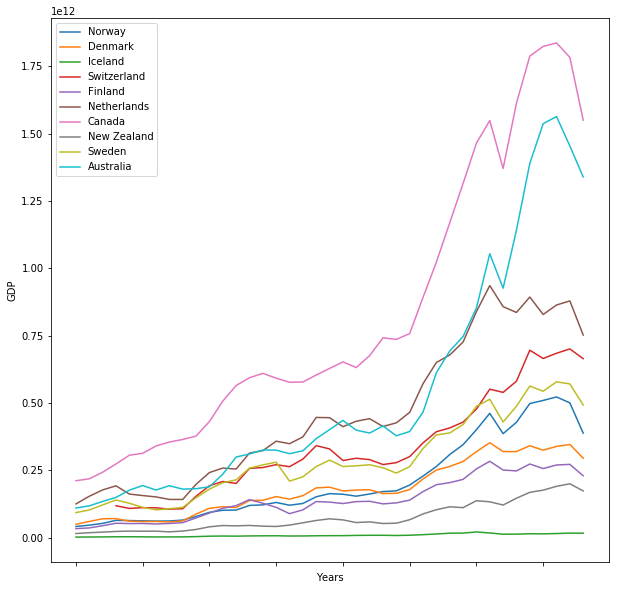

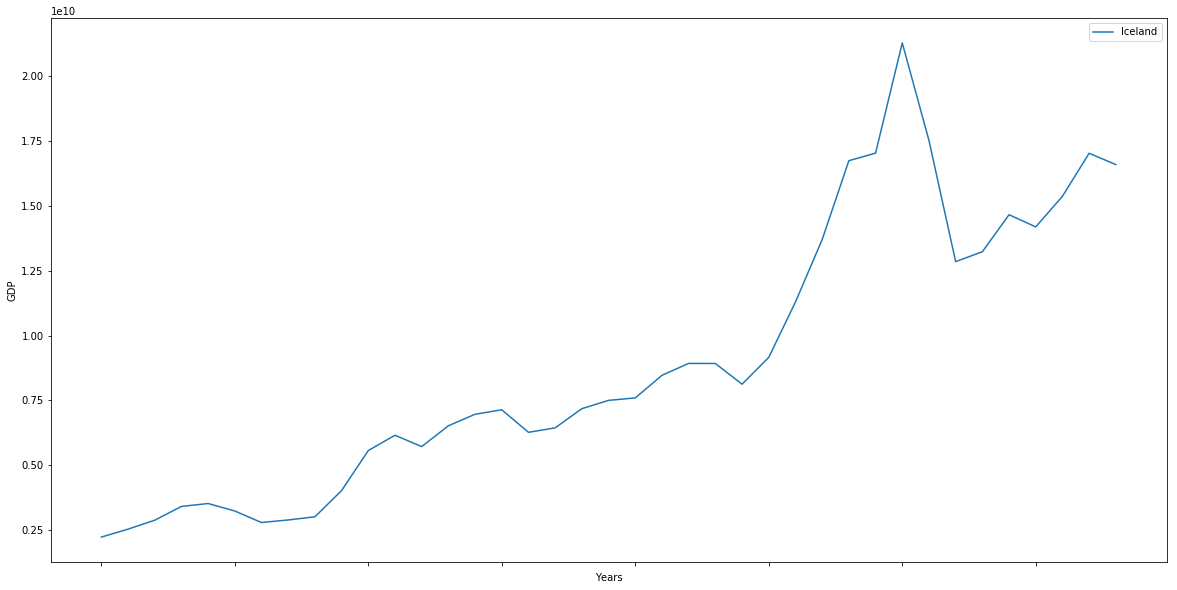

In [116]:
# OLD CELL USING THE HAPPIEST COUNTRY DATA FROM 2017

# Exploration of 20 Happiest Countries Recorded in 2017
happiest_countries_2017 = df_2017.loc[0:10]

#Using a list, the happiest countries are extracted from GDP dataset only spanning the last 50 years
hp_names = happiest_countries_2017["Country"]
hp_cntry_gdp_list = []
for name in hp_names:
    hp_cntry_gdp_list.append(GDP.loc[name, '1977':])
hp_gdp_df = pd.DataFrame(hp_cntry_gdp_list)
hp_gdp_df = hp_gdp_df.T

hp_gdp_df_plt = hp_gdp_df.plot(kind='line', figsize=(10,10))
plt.xlabel('Years')
plt.ylabel('GDP')
plt.show()
# line graph is almost useless considering Canada makes considerably more than Iceland

iceland = hp_gdp_df.loc[:, "Iceland"]
iceland_plt = iceland.plot(kind='line', figsize=(20,10))
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend()
plt.show()

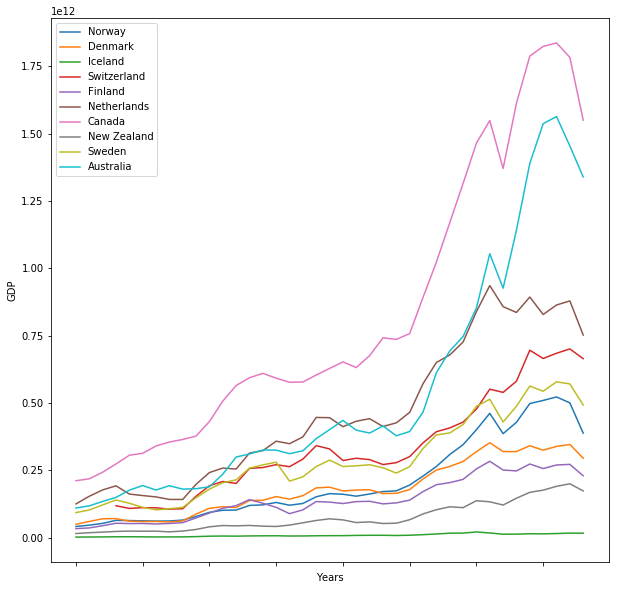

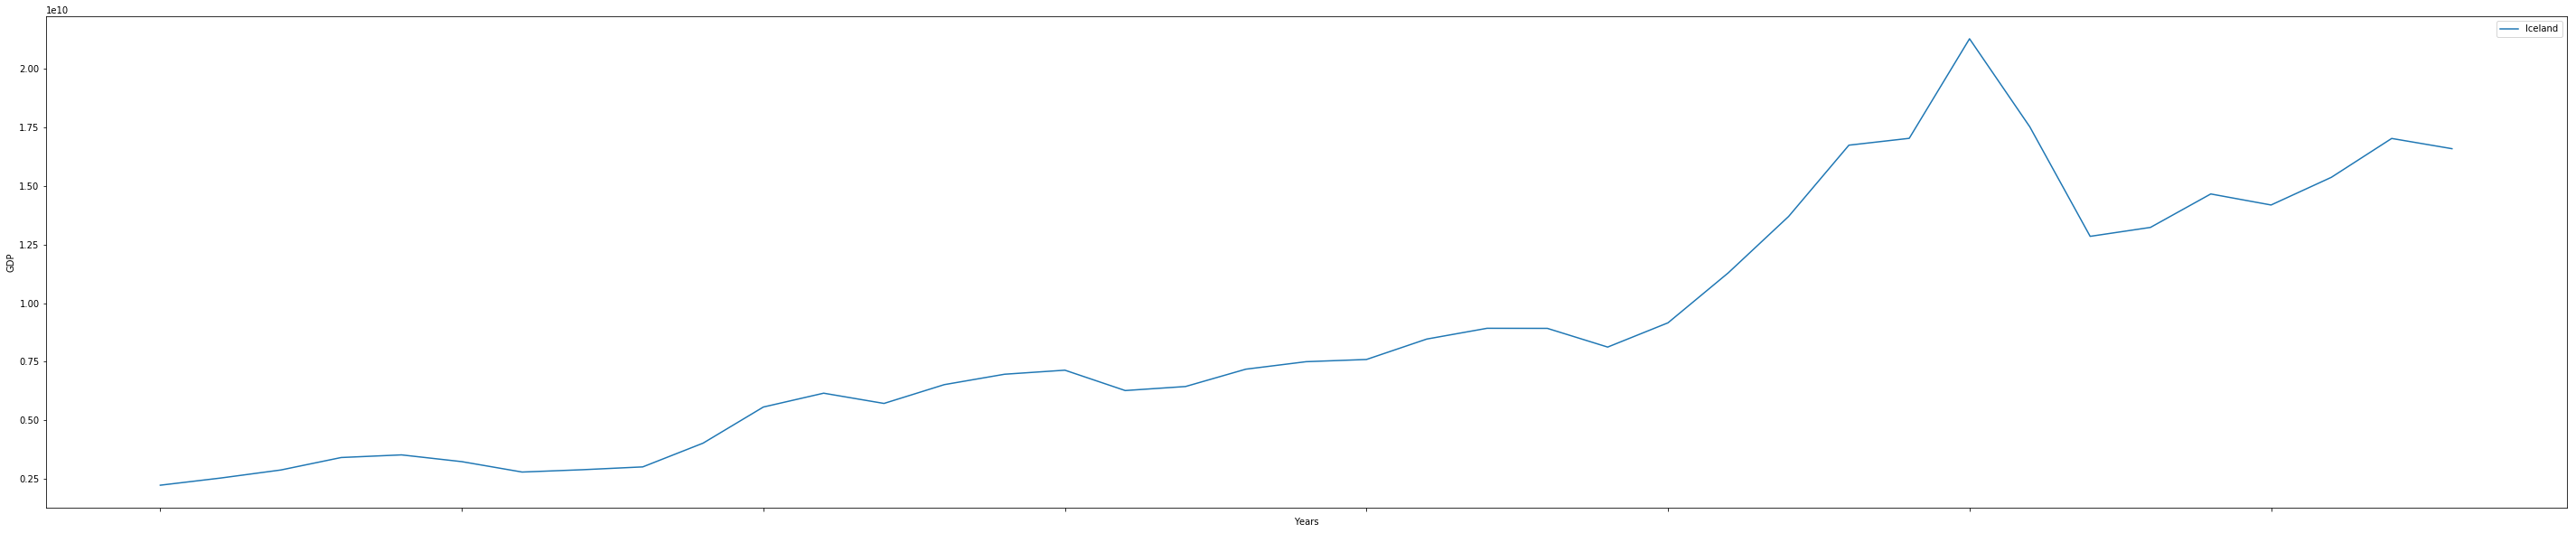

In [108]:
# Old cell used to extract all GDP years instead of only 50 most recent years

# Exploration of 20 Happiest Countries Recorded in 2017
happiest_countries_2017 = df_2017.loc[0:10]

#Using a list, the happiest countries are extracted from GDP dataset
hp_names = happiest_countries_2017["Country"]
hp_cntry_gdp_list = []
for name in hp_names:
    hp_cntry_gdp_list.append(GDP.loc[name, :])
hp_gdp_df = pd.DataFrame(hp_cntry_gdp_list)
hp_gdp_df = hp_gdp_df.drop(columns=["Country Code"])
hp_gdp_df = hp_gdp_df.T

hp_gdp_df_plt = hp_gdp_df.plot(kind='line', figsize=(10,10))
plt.xlabel('Years')
plt.ylabel('GDP')
plt.show()
# line graph is almost useless considering Canada makes considerably more than Iceland

iceland = hp_gdp_df.loc[:, "Iceland"]
iceland_plt = iceland.plot(kind='line', figsize=(20,10))
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [35]:
happiest_countries = df_2015.loc[:25, ['Country', 'Score']]
saddest_countries = df_2015.loc[134:, ['Country', 'Score']]

print(happiest_countries)


switzerland_gdp_increase = switzerland_gdp['2015'] / switzerland_gdp['1980']
print(switzerland_gdp_increase)
togo_gdp_increase = togo_gdp['2015'] / togo_gdp['1980']
print(togo_gdp_increase)
happiest_countries.head()


                   Country  Score
Rank                             
1              Switzerland  7.587
2                  Iceland  7.561
3                  Denmark  7.527
4                   Norway  7.522
5                   Canada  7.427
6                  Finland  7.406
7              Netherlands  7.378
8                   Sweden  7.364
9              New Zealand  7.286
10               Australia  7.284
11                  Israel  7.278
12              Costa Rica  7.226
13                 Austria  7.200
14                  Mexico  7.187
15           United States  7.119
16                  Brazil  6.983
17              Luxembourg  6.946
18                 Ireland  6.940
19                 Belgium  6.937
20    United Arab Emirates  6.901
21          United Kingdom  6.867
22                    Oman  6.853
23               Venezuela  6.810
24               Singapore  6.798
25                  Panama  6.786
5.5996614462515755
3.522256182789936


,Country,Score
Rank,,
1,Switzerland,7.587
2,Iceland,7.561
3,Denmark,7.527
4,Norway,7.522
5,Canada,7.427


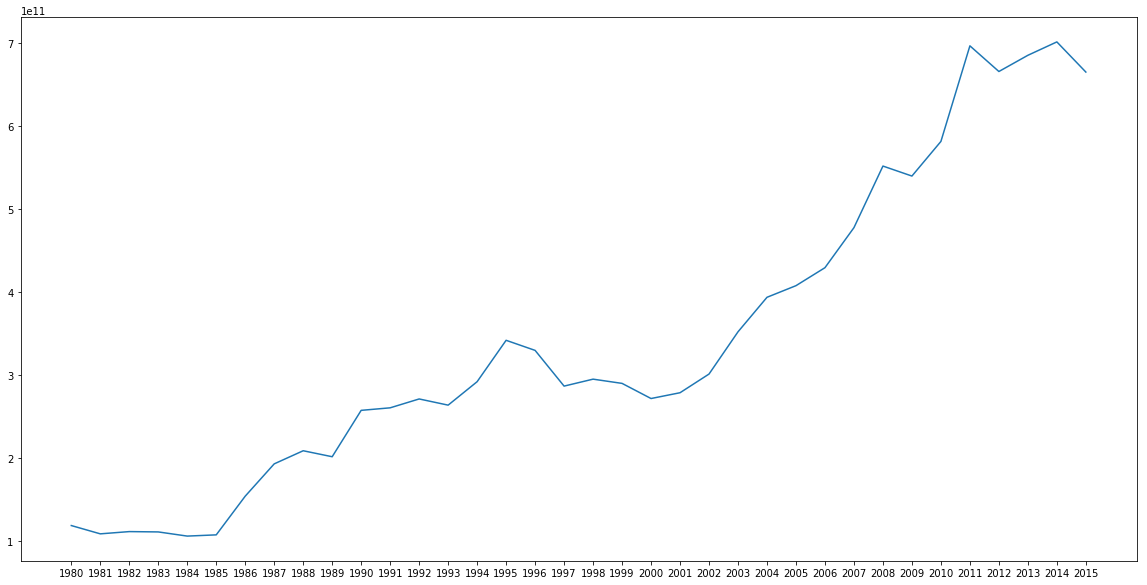

In [13]:
switzerland_gdp = GDP.loc['Switzerland','1980':'2015']
plt.figure(figsize=(20,10))
plt.plot(switzerland_gdp)
plt.show()

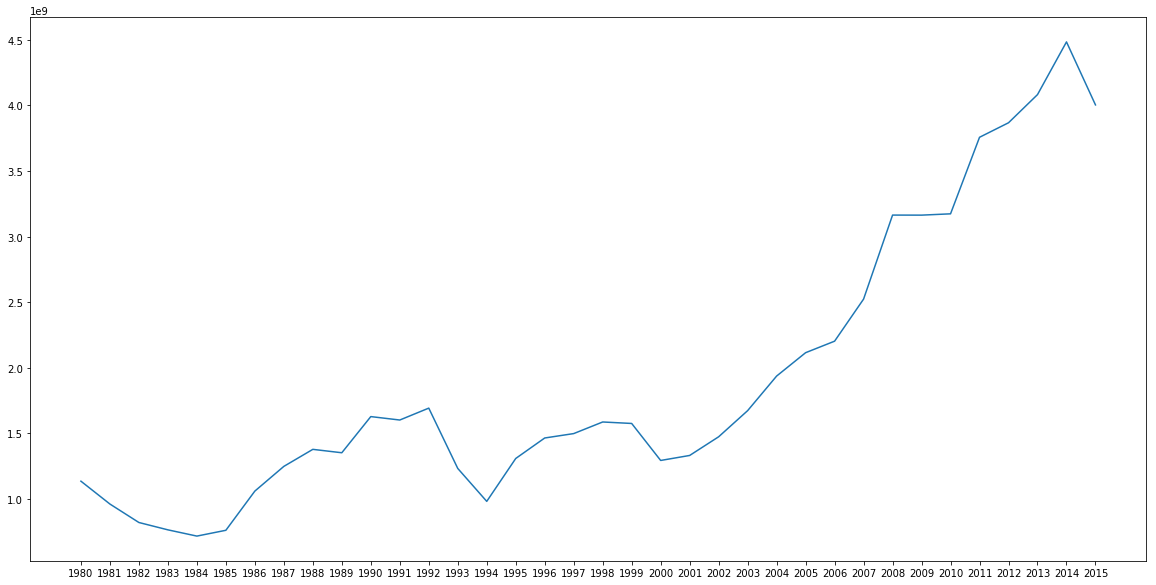

In [14]:
togo_gdp = GDP.loc['Togo','1980':'2015']
plt.figure(figsize=(20,10))
plt.plot(togo_gdp)
plt.show()

In [16]:
happiest_countries_gdp = []

for happy_country in GDP:
    for country in happiest_countries['Country']:
        happiest_countries.append()

NameError: name 'country' is not defined

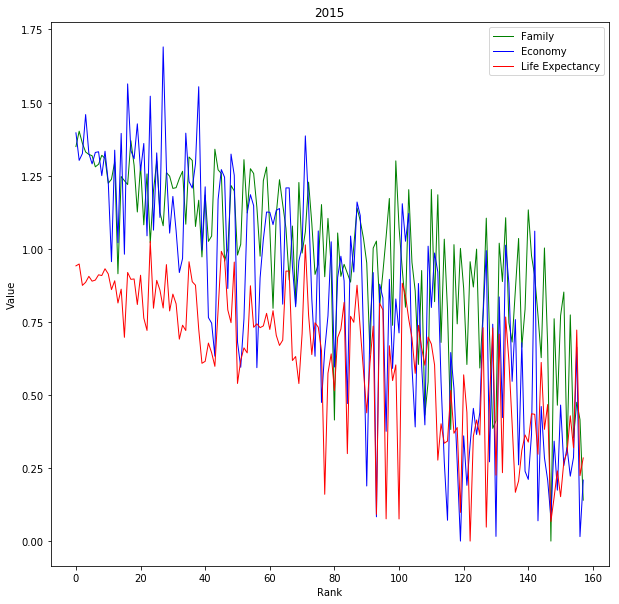

In [107]:
plt.figure(figsize=(10,10))
plt.plot(df_2015['Family'], label='Family', color='g', linewidth=1, alpha=1)
plt.plot(df_2015['Economy'], label='Economy', color='b', linewidth=1, alpha=1)
plt.plot(df_2015['LifeExp'], label='Life Expectancy', color='r', linewidth=1, alpha=1)
plt.xlabel('Rank')
plt.ylabel('Value')
plt.legend()
plt.title('2015')
plt.show()

In [72]:
GDP['Country Name'].unique().tolist()

['Aruba',
 'Andorra',
 'Afghanistan',
 'Angola',
 'Albania',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'Europe & Central 

In [76]:
GDP['Country Name'].nunique() - df_2015['Country'].nunique()

106

In [75]:
sorted(df_2015['Country'].unique().tolist())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 '

In [23]:
# Testing to try and group regions according to continents

print(df_2015['Region'].value_counts(dropna = False))
print('\n')
print(df_2016['Region'].value_counts(dropna = False))



for continent in df_2016['region']:
    if 'Sub_Saharan Africa':
        return 'Africa'
    

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


SyntaxError: 'return' outside function (<ipython-input-23-02a4c57933a9>, line 9)